# Loading Data

In [30]:
import pandas as pd
import pdpipe as pdp
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/transformed/data_for_predicting.csv")
print(df.shape)
#df = pd.read_csv("../data/transformed/data_for_predicting.csv")
print(df.shape)
df = df.loc[df['days_needed'] < 60]
df = df.sort_values(by = ['createdYear', 'createdMonth', 'createdDay'], ascending = True)
df = df.dropna(subset=['assignee'])

(2166, 99)
(2166, 99)


In [31]:
# columns to drop
columns_to_drop = ['Unnamed: 0', 'project', 'status', 'updated', 'key', 'assignee', 'resolution',
                   'days_in_current_status', 'reporter', 'steps_taken' ,
                   'resolutiondate', 'time_needed','created_date','Non-existent_Open', 
                   '0','1','2','3','4','5','6','7','8','9','10', 'days_needed',
                   'Open_Patch Available','Patch Available_In Progress', 'Open_Resolved',
                   'Patch Available_Resolved', 'Resolved_Reopened', 'Reopened_Resolved',
                   'In Progress_Patch Available', 'Patch Available_Open','Reopened_Patch Available',
                   'Open_In Progress', 'In Progress_Resolved', 'index.1', 'createdElapsed', 'step5', 'step0']

# columns that will be scaled with robust scaler
columns_scaling = ['comment_count', 'description_length', 'summary_length', 'watch_count']
# columsn to be one hot encoded
#columns_one_hot_encoding = ['resolution']
# from categorical to numerical data
columns_numerical = ['priority', 'issue_type']
columns_to_change = ['step1', 'step2', 'step3', 'step4']

In [32]:
pipeline = pdp.ColDrop(columns_to_drop) # drop columns
pipeline += pdp.Scale('RobustScaler', columns_scaling) # scale data -> robust scaler, handles outliers
#pipeline += pdp.OneHotEncode(columns_one_hot_encoding) # one hote encoding technique
#pipeline += pdp.Encode(['assignee', 'steps_taken'])
pipeline += pdp.MapColVals('priority', {'Minor': 0, 
                                       'Trival': 1, 
                                       'Blocker': 2,
                                       'Major': 3,
                                       'Critical': 4})
pipeline += pdp.MapColVals('issue_type',{'Test': 0,
                                        'Bug': 1,
                                        'Improvement':2,
                                        'Task':3,
                                        'Wish':4,
                                        'New Feature':5,
                                        'Sub-task':6})


pipeline += pdp.MapColVals(columns_to_change, {'Non-existent': 0,
                                               'Open': 1,
                                               'Resolved': 2,
                                               'Patch Available': 3,
                                               'Reopened': 4,
                                               'In Progress': 5,
                                               'Reopened': 6,
                                                '0': 0,
                                              })


print(pipeline)

df2 = pipeline(df)
df2.shape



A pdpipe pipeline:
[ 0]  Drop columns Unnamed: 0, project, status, updated, key, assignee,
      resolution, days_in_current_status, reporter, steps_taken,
      resolutiondate, time_needed, created_date, Non-existent_Open, 0, 1, 2,
      3, 4, 5, 6, 7, 8, 9, 10, days_needed, Open_Patch Available, Patch
      Available_In Progress, Open_Resolved, Patch Available_Resolved,
      Resolved_Reopened, Reopened_Resolved, In Progress_Patch Available,
      Patch Available_Open, Reopened_Patch Available, Open_In Progress, In
      Progress_Resolved, index.1, createdElapsed, step5, step0
[ 1]  Scale columns comment_count, description_length, summary_length,
      watch_count
[ 2]  Map values of columns priority with {'Minor': 0, 'Trival': 1,
      'Blocker': 2, 'Major': 3, 'Critical': 4}.
[ 3]  Map values of columns issue_type with {'Test': 0, 'Bug': 1,
      'Improvement': 2, 'Task': 3, 'Wish': 4, 'New Feature': 5, 'Sub-task':
      6}.
[ 4]  Map values of columns step1, step2, step3, step4 wi

(1024, 58)

## Pipeline

In [91]:
# columns to drop
columns_to_drop = ['Unnamed: 0', 'project', 'status', 'updated', 'key',
                   'days_in_current_status', 'reporter',
                   'resolutiondate', 'time_needed','created_date','Non-existent_Open', 
                   '0','1','2','3','4','5','6','7','8','9','10', 'days_needed',
                   'Open_Patch Available','Patch Available_In Progress', 'Open_Resolved',
                   'Patch Available_Resolved', 'Resolved_Reopened', 'Reopened_Resolved',
                   'In Progress_Patch Available', 'Patch Available_Open','Reopened_Patch Available',
                   'Open_In Progress', 'In Progress_Resolved', 'index.1', 'createdElapsed', 'step5', 'step0']

# columns that will be scaled with robust scaler
columns_scaling = ['comment_count', 'description_length', 'summary_length', 'watch_count']
# columsn to be one hot encoded
columns_one_hot_encoding = ['resolution' ]
# from categorical to numerical data
columns_numerical = ['priority', 'issue_type']
columns_to_change = ['step1', 'step2', 'step3', 'step4']

In [81]:
pipeline = pdp.ColDrop(columns_to_drop) # drop columns
pipeline += pdp.Scale('RobustScaler', columns_scaling) # scale data -> robust scaler, handles outliers
pipeline += pdp.OneHotEncode(columns_one_hot_encoding) # one hote encoding technique
pipeline += pdp.Encode(['assignee', 'steps_taken'])
pipeline += pdp.MapColVals('priority', {'Minor': 0, 
                                       'Trival': 1, 
                                       'Blocker': 2,
                                       'Major': 3,
                                       'Critical': 4})
pipeline += pdp.MapColVals('issue_type',{'Test': 0,
                                        'Bug': 1,
                                        'Improvement':2,
                                        'Task':3,
                                        'Wish':4,
                                        'New Feature':5,
                                        'Sub-task':6})


pipeline += pdp.MapColVals(columns_to_change, {'Non-existent': 0,
                                               'Open': 1,
                                               'Resolved': 2,
                                               'Patch Available': 3,
                                               'Reopened': 4,
                                               'In Progress': 5,
                                               'Reopened': 6,
                                                '0': 0,
                                              })


print(pipeline)

df2 = pipeline(df)
df2.shape


A pdpipe pipeline:
[ 0]  Drop columns Unnamed: 0, project, status, updated, key,
      days_in_current_status, reporter, resolutiondate, time_needed,
      created_date, Non-existent_Open, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
      days_needed, Open_Patch Available, Patch Available_In Progress,
      Open_Resolved, Patch Available_Resolved, Resolved_Reopened,
      Reopened_Resolved, In Progress_Patch Available, Patch Available_Open,
      Reopened_Patch Available, Open_In Progress, In Progress_Resolved,
      index.1, createdElapsed, step5, step0
[ 1]  Scale columns comment_count, description_length, summary_length,
      watch_count
[ 2]  One-hot encode resolution
[ 3]  Encode assignee, steps_taken
[ 4]  Map values of columns priority with {'Minor': 0, 'Trival': 1,
      'Blocker': 2, 'Major': 3, 'Critical': 4}.
[ 5]  Map values of columns issue_type with {'Test': 0, 'Bug': 1,
      'Improvement': 2, 'Task': 3, 'Wish': 4, 'New Feature': 5, 'Sub-task':
      6}.
[ 6]  Map values of colum

(1119, 66)

In [33]:
df2 = df2.fillna(0)
df2.shape

(1024, 58)

In [84]:
### df2 = df2.reset_index().drop(columns = 'index')

## Machine Learning Model
### Train test split

In [34]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns = ['hours_needed', 'index']).to_numpy()
y = df2[['hours_needed']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Linear Regressor

/Users/thomsuykerbuyk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


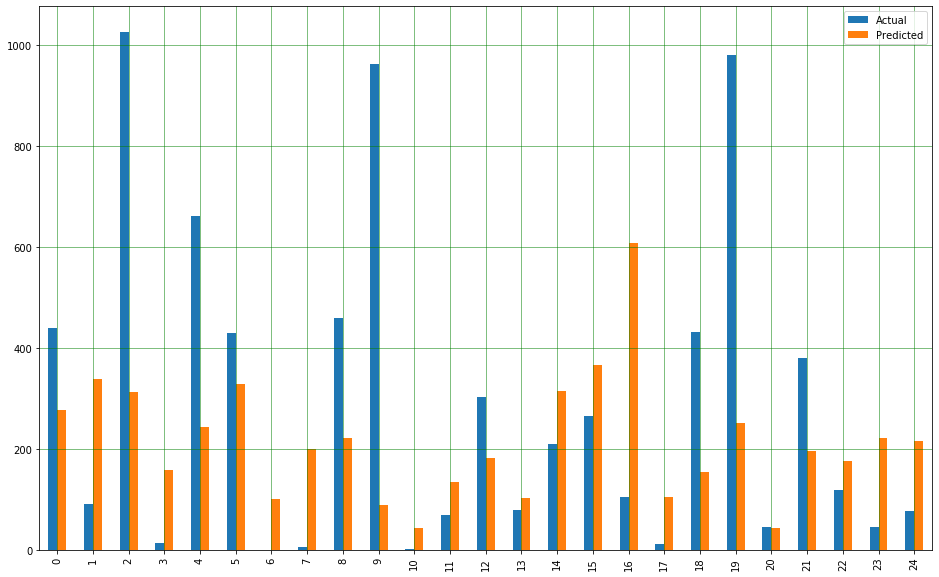

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)
df1['Predicted'] = [int(i) for i in df1['Predicted']]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) / 24)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.31159806910569
Mean Squared Error: 74766.40501143293
Root Mean Squared Error: 273.4344620040293


# Save model

In [88]:
from joblib import Memory
import joblib as joblib

filename = '../model/machine_learning_model.sav'
joblib.dump(regression_model, filename)

['../model/machine_learning_model.sav']

# Load model

In [89]:
# read dataset
import pandas as pd
from joblib import Memory
import joblib as joblib

import pandas as pd
import pdpipe as pdp
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../data/transformed/data_for_train.csv")
df = df.sort_values(by = ['createdYear', 'createdMonth', 'createdDay'], ascending = True)
df = df.dropna(subset=['assignee'])

# columns to drop
columns_to_drop = ['Unnamed: 0', 'project', 'status', 'updated', 'key',
                   'days_in_current_status', 'reporter',
                   'resolutiondate', 'time_needed','created_date','Non-existent_Open', 
                   '0','1','2','3','4','5','6','7','8','9','10', 'days_needed',
                   'Open_Patch Available','Patch Available_In Progress', 'Open_Resolved',
                   'Patch Available_Resolved', 'Resolved_Reopened', 'Reopened_Resolved',
                   'In Progress_Patch Available', 'Patch Available_Open','Reopened_Patch Available',
                   'Open_In Progress', 'In Progress_Resolved', 'index.1', 'createdElapsed', 'step5', 'step0']

# columns that will be scaled with robust scaler
columns_scaling = ['comment_count', 'description_length', 'summary_length', 'watch_count']
# columsn to be one hot encoded
columns_one_hot_encoding = [ 'resolution']
# from categorical to numerical data
columns_numerical = ['priority', 'issue_type']
columns_to_change = ['step1', 'step2', 'step3', 'step4']
# columns that will be scaled with robust scaler
columns_scaling = ['comment_count', 'description_length', 'summary_length', 'watch_count']
# columsn to be one hot encoded
columns_one_hot_encoding = ['steps_taken', 'resolution', ]
# from categorical to numerical data
columns_numerical = ['priority', 'issue_type']
columns_to_change = ['step1', 'step2', 'step3', 'step4']

pipeline = pdp.ColDrop(columns_to_drop) # drop columns
pipeline += pdp.Scale('RobustScaler', columns_scaling) # scale data -> robust scaler, handles outliers
pipeline += pdp.OneHotEncode(columns_one_hot_encoding) # one hote encoding technique
pipeline += pdp.Encode(['assignee', 'steps_taken'])
pipeline += pdp.MapColVals('priority', {'Minor': 0, 
                                       'Trival': 1, 
                                       'Blocker': 2,
                                       'Major': 3,
                                       'Critical': 4})
pipeline += pdp.MapColVals('issue_type',{'Test': 0,
                                        'Bug': 1,
                                        'Improvement':2,
                                        'Task':3,
                                        'Wish':4,
                                        'New Feature':5,
                                        'Sub-task':6})


pipeline += pdp.MapColVals(columns_to_change, {'Non-existent': 0,
                                               'Open': 1,
                                               'Resolved': 2,
                                               'Patch Available': 3,
                                               'Reopened': 4,
                                               'In Progress': 5,
                                               'Reopened': 6,
                                                '0': 0,
                                              })



df2 = pipeline(df)
df2 = df2.fillna(0)
print(df2.shape)

# load the model from disk
filename = '../model/machine_learning_model.sav'
loaded_model = joblib.load(filename)



FailedPreconditionError: Pipeline stage failed because not all columns assignee, steps_taken were found in the input dataframe.

In [51]:
X = df2.drop(columns = ['hours_needed', 'index']).to_numpy()
#y = df2[['hours_needed']].to_numpy()

df['predicted_value'] = loaded_model.predict(X)

In [19]:
df['']

0        668.75
1        -94.00
2        594.50
3       1227.75
4       1504.00
         ...   
1417    -795.00
1418      60.75
1419   -2020.00
1420    -867.25
1421     -83.50
Name: predicted_value, Length: 1422, dtype: float64

In [52]:
from datetime import datetime, timedelta



df[['key', 'created_date', 'hours_needed' ,'predicted_value']].to_csv('someting.csv')
df['created_date'] = pd.to_datetime(df['created_date'])


df = df.reset_index()

df['predicted_value'] = df['predicted_value'].astype(int)

j = []
for i in df['predicted_value']:
    if i > 1000000:
        i = int(str(i)[:3])
        j.append(timedelta(hours = i))
    else:
        j.append(timedelta(hours = i))
df['j'] = j
df['predicted_date'] = df['created_date'] + df['j']
df= df[['key','created_date','predicted_value', 'predicted_date' ,'resolutiondate']]

df.to_csv('../data/result/prediction.csv')

In [53]:
df.head()

,key,created_date,predicted_value,predicted_date,resolutiondate
0,AVRO-2,2009-04-09 22:34:55.599000+00:00,524,2009-05-01 18:34:55.599000+00:00,2009-06-02 19:04:10.508000+00:00
1,AVRO-1,2009-04-09 22:09:08.216000+00:00,258,2009-04-20 16:09:08.216000+00:00,2009-04-27 20:14:06.572000+00:00
2,AVRO-4,2009-04-10 23:20:38.998000+00:00,87,2009-04-14 14:20:38.998000+00:00,2009-04-14 22:12:34.962000+00:00
3,AVRO-3,2009-04-10 20:14:54.370000+00:00,132,2009-04-16 08:14:54.370000+00:00,2009-04-10 23:31:56.052000+00:00
4,AVRO-6,2009-04-11 17:32:37.971000+00:00,388,2009-04-27 21:32:37.971000+00:00,2009-04-14 21:43:08.903000+00:00


### DecisionTree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

dtm = DecisionTreeRegressor()

dtm.fit(X_train,y_train)

y_pred = dtm.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)/ 24)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2, 4, 6, 8],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 10, 20],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=4)
grid_cv_dtm.fit(X,y)

In [ ]:
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

In [ ]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)


In [ ]:
import seaborn as sns
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [ ]:
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn import metrics

best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) / 24)  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from joblib import Memory
import joblib as joblib

filename = '../model/machine_learning_model.sav'
joblib.dump(regression_model, filename)



# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)

In [ ]:
from datetime import datetime, timedelta
X = df2.drop(columns = ['hours_diff', 'index']).to_numpy()

df['predicted_value'] = loaded_model.predict(X)
df[['key', 'created_date', 'hours_diff' ,'predicted_value', 'differnce_days']].to_csv('someting.csv')
df['created_date'] = pd.to_datetime(df['created_date'])

df = df.drop(columns = 'level_0')
df = df.reset_index()

df['predicted_value'] = df['predicted_value'].astype(int)

j = []
for i in df['predicted_value']:
    if i > 1000000:
        i = int(str(i)[:3])
        j.append(timedelta(hours = i))
    else:
        j.append(timedelta(hours = i))
df['j'] = j
df['predicted_date'] = df['created_date'] + df['j']
df= df[['key','created_date','predicted_value', 'predicted_date' ,'resolutiondate']]

df.to_csv('../data/result/prediction.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1])[:10]:
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()